In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

## Load Data:

In [2]:
train = pd.read_csv("train.csv", header=0)
test = pd.read_csv("test.csv", header=0)
validate = pd.read_csv("validate.csv", header=0)

In [3]:
train.dtypes

Number_of_valued_Kneset_members                         float64
Yearly_IncomeK                                          float64
Overall_happiness_score                                 float64
Avg_Satisfaction_with_previous_vote                     float64
Garden_sqr_meter_per_person_in_residancy_area           float64
Weighted_education_rank                                 float64
Vote                                                     object
Number_of_valued_Kneset_members_isNull                    int64
Yearly_IncomeK_isNull                                     int64
Overall_happiness_score_isNull                            int64
Avg_Satisfaction_with_previous_vote_isNull                int64
Garden_sqr_meter_per_person_in_residancy_area_isNull      int64
Weighted_education_rank_isNull                            int64
Most_Important_Issue_int                                  int64
Will_vote_only_large_party_int                            int64
dtype: object

## Arrange Classifiers:

In [4]:
names = ["Nearest Neighbors", "Naive Bayes", "Decision Tree", "Perceptron", 
         "Linear SVM OVO", "Linear SVM OVR", "MLP"] 

In [23]:
classifiers = {
    KNeighborsClassifier(1):"Nearest Neighbors",
    GaussianNB():"Naive Bayes",
    DecisionTreeClassifier(max_depth=5):"Decision Tree",
    Perceptron(n_iter=100):"Perceptron",
    SVC(kernel="linear", C=1):"Linear SVM OVO",
    LinearSVC(C=1):"Linear SVM OVR",
    MLPClassifier(verbose=0, activation='relu', hidden_layer_sizes=(50, 25, 10), 
                  random_state=0, max_iter=500, solver='sgd', 
                  learning_rate='invscaling', momentum=.9,
                  nesterovs_momentum=True, learning_rate_init=0.2):"MLP"}
    

## Arrange data sets:

In [32]:
X_train = train.drop(['Vote'],1)
Y_train = train.Vote
X_test = train.drop(['Vote'],1)
Y_test = train.Vote
X_validate = validate.drop(['Vote'],1)
Y_validate = validate.Vote

## Run over classifiers:

In [30]:
test_scores = {"Nearest Neighbors":0, "Naive Bayes":0, "Decision Tree":0, "Perceptron":0, 
         "Linear SVM OVO":0, "Linear SVM OVR":0, "MLP":0}

In [31]:
# iterate over classifiers

for clf in classifiers:
    clf.fit(X_train, Y_train)
    test_scores[classifiers[clf]] = clf.score(X_test, Y_test)


/Users/odedgolden/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [29]:
test_scores

{'Decision Tree': 0.82499999999999996,
 'Linear SVM OVO': 0.90833333333333333,
 'Linear SVM OVR': 0.64016666666666666,
 'MLP': 0.18516666666666667,
 'Naive Bayes': 0.85833333333333328,
 'Nearest Neighbors': 1.0,
 'Perceptron': 0.52833333333333332}

In [34]:
validate_scores = {"Nearest Neighbors":0, "Naive Bayes":0, "Decision Tree":0, "Perceptron":0, 
         "Linear SVM OVO":0, "Linear SVM OVR":0, "MLP":0}

In [35]:
for clf in classifiers:
    validate_scores[classifiers[clf]] = clf.score(X_validate, Y_validate)

In [36]:
validate_scores

{'Decision Tree': 0.80900000000000005,
 'Linear SVM OVO': 0.90700000000000003,
 'Linear SVM OVR': 0.71850000000000003,
 'MLP': 0.188,
 'Naive Bayes': 0.85450000000000004,
 'Nearest Neighbors': 0.76800000000000002,
 'Perceptron': 0.52449999999999997}

## Choose classifiers:

The best score is for Linear SVM OVO

In [37]:
svm = classifiers.keys()[classifiers.values().index('Linear SVM OVO')]

## Predict Election Results:

In [47]:
predictions = svm.predict(X_validate)
parties = Y_train.unique()

In [48]:
# predictions
parties

array(['Purples', 'Browns', 'Greens', 'Blues', 'Whites', 'Pinks', 'Reds',
       'Oranges', 'Yellows', 'Greys'], dtype=object)

In [68]:
results = {'Purples':0, 'Browns':0, 'Greens':0, 'Blues':0, 'Whites':0, 'Pinks':0, 'Reds':0,
       'Oranges':0, 'Yellows':0, 'Greys':0}

In [69]:
for p in predictions:
    for party in parties:
        if p==party:
            results[party]= results[party]+1
            
            

In [70]:
len(predictions)
results

{'Blues': 186,
 'Browns': 432,
 'Greens': 320,
 'Greys': 120,
 'Oranges': 112,
 'Pinks': 202,
 'Purples': 385,
 'Reds': 102,
 'Whites': 44,
 'Yellows': 97}

## Plot results pie:

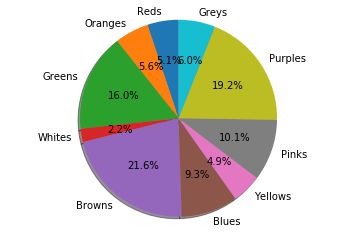

In [76]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = results.keys()
sizes = results.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=[0]*len(sizes), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Confusion Matrix:

In [72]:
confusion_matrix(Y_validate, predictions, labels=None, sample_weight=None)

array([[166,   0,   0,   0,   0,   0,   0,   0,   0,  18],
       [  0, 369,   0,   0,   0,   2,   3,   0,   2,   0],
       [  0,   0, 319,   0,   0,   0,   2,   0,   0,   0],
       [  0,   1,   0, 113,  10,   0,   0,   3,   0,   0],
       [  0,   0,   0,   2,  91,   0,   0,   6,   0,   0],
       [  0,  27,   0,   0,   0, 187,   4,   0,   2,   0],
       [  0,  24,   1,   0,   0,   4, 364,   0,   7,   0],
       [  0,   0,   0,   5,  11,   0,   1,  93,   0,   0],
       [  0,  11,   0,   0,   0,   9,  11,   0,  33,   0],
       [ 20,   0,   0,   0,   0,   0,   0,   0,   0,  79]])